In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('/content/project10.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

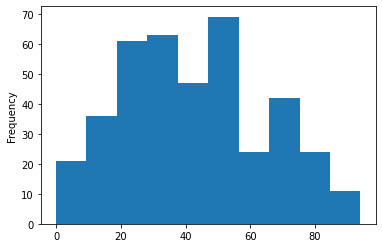

In [32]:
df['acceleration'].plot.hist()

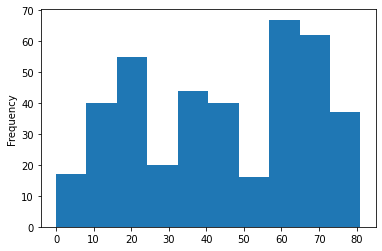

In [33]:
df['displacement'].plot.hist()

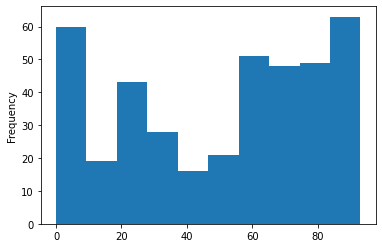

In [34]:
df['horsepower'].plot.hist()

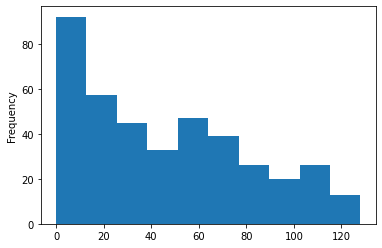

In [35]:
df['mpg'].plot.hist()

In [39]:
from scipy.stats import boxcox
df['mpg']=np.sqrt(df['mpg'])


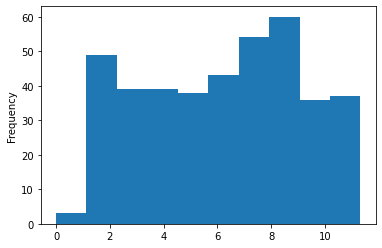

In [40]:
df['mpg'].plot.hist()

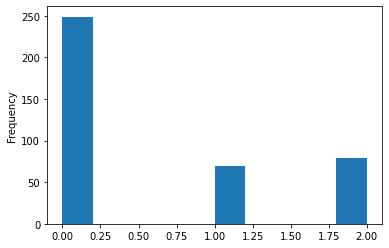

In [41]:
df['origin'].plot.hist()

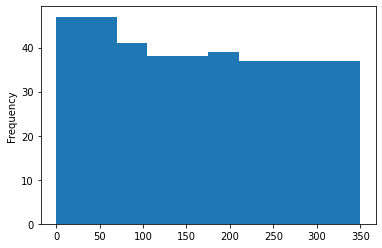

In [42]:
df['weight'].plot.hist()

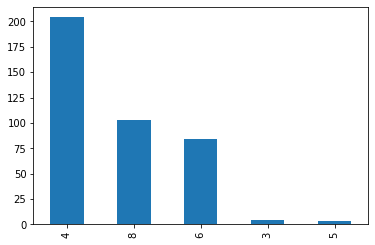

In [8]:
df['cylinders'].value_counts().plot(kind='bar')

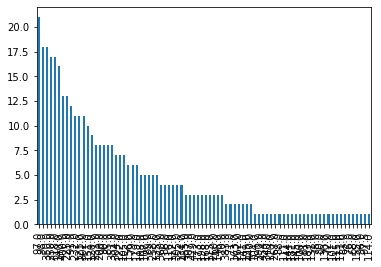

In [9]:
df['displacement'].value_counts().plot(kind='bar')

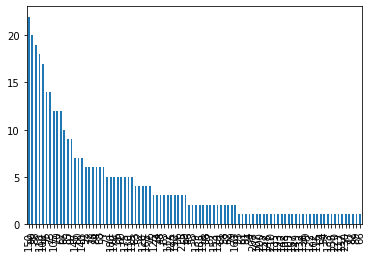

In [10]:
df['horsepower'].value_counts().plot(kind='bar')

In [11]:
df['horsepower'].value_counts().max()

22

In [12]:
df['horsepower'].value_counts().min()

1

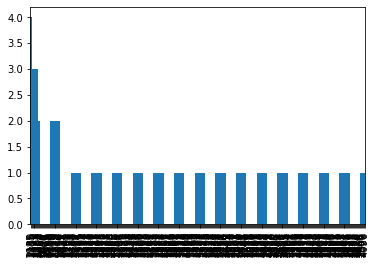

In [13]:
df['weight'].value_counts().plot(kind='bar')

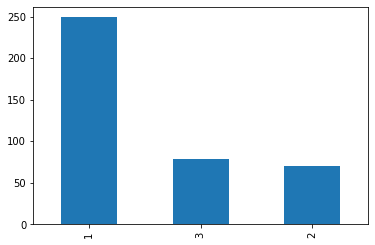

In [14]:
df['origin'].value_counts().plot(kind='bar')

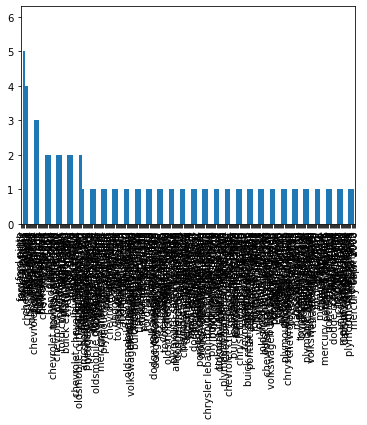

In [15]:
df['car name'].value_counts().plot(kind='bar')

In [43]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [44]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,17,4,69,15,247,13,0,0,49
1,7,4,72,33,265,11,0,0,36
2,17,4,70,27,241,6,0,0,231
3,9,4,67,27,240,13,0,0,14
4,13,4,66,22,244,5,0,0,161


In [45]:
# Checking and removing outliers from data 
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(398, 9)
(398, 9)


In [46]:
df.skew()

mpg             0.498100
cylinders       0.277492
displacement   -0.147391
horsepower     -0.316618
weight          0.100702
acceleration    0.222112
model year      0.011535
origin          0.923776
car name        0.018665
dtype: float64

In [49]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df1[col]=np.sqrt(df[col])

In [50]:
df.skew()

mpg             0.498100
cylinders       0.277492
displacement   -0.147391
horsepower     -0.316618
weight          0.100702
acceleration    0.222112
model year      0.011535
origin          0.923776
car name        0.018665
dtype: float64

In [51]:
x=df[['acceleration','mpg','cylinders','displacement','horsepower','weight','acceleration','model year','car name']]
y=df['origin']

In [52]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(278, 9) (120, 9)
(278,) (120,)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [54]:
KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [55]:
models=[]
models.append(('KNeighborsClassifier',KNN))
# models.append(('SVC',sv))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [57]:
!pip install scikit-plot

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import scikitplot as skplt

In [59]:
def multi_class_ROC(model, X_test, y_test):
  y_predict_proba = model.predict_proba(X_test)
  skplt.metrics.plot_roc_curve(y_test, y_predict_proba)
  plt.show()

****************************** KNeighborsClassifier ********************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.7916666666666666


cross_val_score= 0.7608333333333334




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


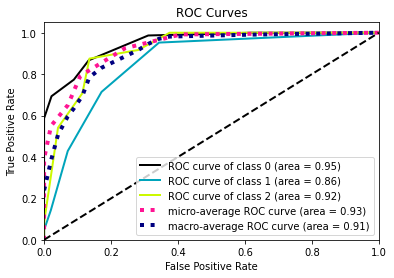




****************************** LogisticRegression ********************************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.7666666666666667




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


cross_val_score= 0.7358333333333333




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


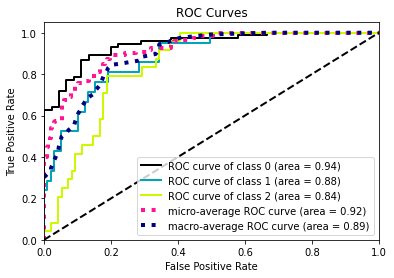




****************************** DecisionTreeClassifier ********************************************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')


Accuracy_score= 0.825


cross_val_score= 0.861346153846154




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


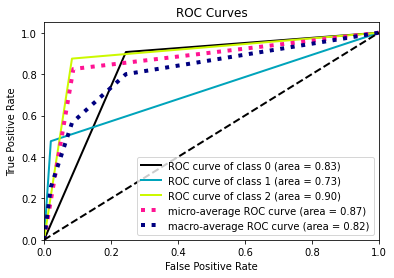




****************************** GaussianNB ********************************************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.625


cross_val_score= 0.6593589743589743




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


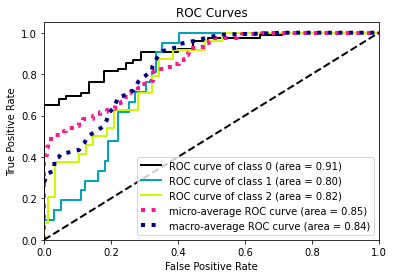

In [60]:
Model = []
score = []
cvs = []
rocscore=[]
for name,model in models:
    print('******************************',name,'********************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    y_predict_proba=pre
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    print('\n')
    multi_class_ROC(model, x_test, y_test)
    print('\n\n')

In [61]:
result=pd.DataFrame({'Model':models,'Accuracy_score':AS,'Cross_val_score':sc,'ROC_AUC_curve':score})

In [62]:
result

,Model,Accuracy_score,Cross_val_score,ROC_AUC_curve
0,"(KNeighborsClassifier, KNeighborsClassifier(al...",0.625,0.659359,79.166667
1,"(LogisticRegression, LogisticRegression(C=1.0,...",0.625,0.659359,76.666667
2,"(DecisionTreeClassifier, DecisionTreeClassifie...",0.625,0.659359,82.500000
3,"(GaussianNB, GaussianNB(priors=None, var_smoot...",0.625,0.659359,62.500000


In [64]:
import pickle
project10_model = pickle.dumps(DT) 
DT_from_pickle = pickle.loads(project10_model) 
DT_from_pickle.predict(x_test) 

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 1, 0])